In [1]:
path_data="E:/data/word_nlp/train_set.csv/train_set.csv"

In [2]:
import pandas as pd

#### 数据读入

In [3]:
df=pd.read_csv(path_data)

In [11]:
labels=[]
contents=[]
sentence_len=[]
all_words=[]
for ele in df["label\ttext"].str.split("\t"):
    labels.append(ele[0])
    contents.append(ele[1])
    all_words.extend(ele[1].split(" "))
    all_words=list(set(all_words))
    sentence_len.append(len(ele[1].split(" ")))

In [12]:
df_news=pd.DataFrame(columns=["labels","sentences","sen_len"])
df_news.labels=labels
df_news.sentences=contents
df_news.sen_len=sentence_len

#### 类别情况分析
最多的类别为第0类，样本数38918，最少的类别为第13类，样本数908。为不均衡分类，需要采取上采样，下采样等方式，或者多模型组合

In [13]:
for one in list(df_news.labels.groupby(labels)):
    print(one[0],len(one[1]))

0 38918
1 36945
10 4920
11 3131
12 1821
13 908
2 31425
3 22133
4 15016
5 12232
6 9985
7 8841
8 7847
9 5878


In [28]:
#df_news

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#### 句长分析
可以看到样本主要集中在句长为2000以内

C:\Love\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


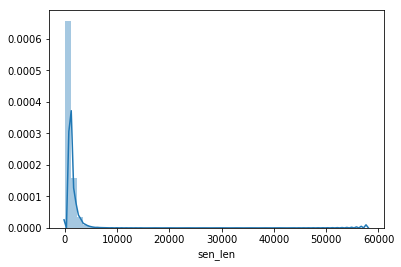

In [16]:

sns.distplot(df_news.sen_len)

In [25]:
df_news[df_news.sen_len>5000]

,labels,sentences,sen_len
71,6,7058 6045 6656 2477 7539 2289 6242 2106 4454 8...,7125
145,1,5602 2073 4464 6065 4853 1141 5036 2923 913 52...,5291
167,8,5810 790 4123 4053 2465 2970 5305 913 4326 185...,6301
173,3,1460 1610 4350 517 6663 4321 1903 910 2399 206...,5433
322,1,2252 5938 7023 3648 5370 3067 4553 2549 3344 7...,6527
...,...,...,...
198920,7,4562 3893 3272 5519 885 948 1722 5920 7495 243...,10620
199046,1,6065 2073 3659 5602 4853 2716 1970 6357 2614 2...,9927
199582,2,5284 5510 2109 1335 6666 2983 101 3554 383 404...,5152
199638,13,7251 5297 531 1102 648 1999 6040 5411 5778 327...,6399


In [23]:
len(df_news[df_news.sen_len<2000])/200000

0.920165

#### 词汇量分析
这里单词个数为6869，在后期计算时可能对其坐min_df,max_df操作

In [26]:
## 这里在计算之初，必须每次都set，不然list太大，跑挂电脑两次...i7,8G
len(all_words)

6869

### 初步总结
由于是长文本分类，故放弃rnn系列的网络。打算第一步先尝试fasttext